In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
plt.style.use('./mystyle.mplstyle')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Define constants
PATH = '/home/catherinej/BarrierIslandBreachProject/data/processed/'
GAUGES = {
    'west': [84, 82],
    'central': [45, 133],
    'east': [11, 119]
}
COLORS = {
    'nob': 'black',
    'width': '#009E73',
    'depth': '#56B4E9',
    'dw': '#D55E00',
    'loc': '#CC79A7',
    'east': '#E69F00',
    'west': 'grey'
}


CATEGORIES = ['nob', 'width', 'depth', 'dw', 'loc', 'east', 'west']

# Functions for data manipulation and plotting
def load_data(loc, num):
    filename = f'{loc}_gauge1{num:04}.pkl.gz'
    return pd.read_pickle(PATH + filename)

def extract_columns(df):
    columns = {}
    columns['nob'] = df['no_breach']
    
    width_cols = df.filter(like='w').columns
    depth_cols = df.filter(like='d').columns
    dw_cols = df.filter(like='dw').columns
    west_cols = df.filter(like='west').columns
    
    columns['width'] = df[width_cols].drop(dw_cols.union(west_cols), axis=1, errors='ignore')
    columns['depth'] = df[depth_cols].drop(dw_cols.union(west_cols), axis=1, errors='ignore')
    
    for category in ['dw', 'loc', 'east', 'west']:
        columns[category] = df.filter(like=category)
    return columns



def calculate_statistics(df):
    stats = {}
    stats['mean'] = df.mean(axis=1).values
    stats['median'] = df.median(axis=1).values
    stats['q5'] = df.quantile(0.05, axis=1).values
    stats['q95'] = df.quantile(0.95, axis=1).values
    return stats

def plot_data(ax, columns):
    for category, data in columns.items():
        color = COLORS[category]
        if category == 'nob':
            ax.plot(data.index, data, linestyle='--', color=color, label='No breach')
        else:
            stats = calculate_statistics(data)
            ax.plot(data.index, stats['mean'], color=color, label=category.capitalize())
            ax.plot(data.index, stats['median'], linestyle='--', color=color)
            ax.fill_between(data.index, stats['q5'], stats['q95'], color=color, alpha=0.3)
    
    # ax.set_xlim(-2, 8)
    # Set consistent x and y axis ticks
    ax.set_xlim(-2, 8)
    ax.set_xticks(range(-2, 9, 2))  # Ticks every 2 hours
    ax.set_yticks([-1.0, 0.0, 1.0, 2.0])  # Consistent y ticks
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.get_major_formatter()._usetex = False
    ax.yaxis.get_major_formatter()._usetex = False


# Plotting
fig = plt.figure(constrained_layout=True, figsize=(7, 7))
subfigs = fig.subfigures(nrows=3, ncols=1, gridspec_kw={'height_ratios': [1, 1, 1]})
letters = ['a', 'b', 'c', 'd', 'e', 'f']

for i, (loc, nums) in enumerate(GAUGES.items()):
    axs = subfigs[i].subplots(nrows=1, ncols=2)
    mid = (fig.subplotpars.right + fig.subplotpars.left)/2
    subfigs[i].suptitle(f'{loc.capitalize()}', x=mid)
    for j, num in enumerate(nums):
        ax = axs[j]
        df = load_data(loc, num)
        columns = extract_columns(df)
        plot_data(ax, columns)
        ax.set_title(f'Gauge {letters[i*2+j]}')
        if j == 0:
            ax.set_ylabel('Surge height (m)')
        if i == len(GAUGES) - 1:
            ax.set_xlabel('Hours from landfall')
        

# Legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center',
           bbox_to_anchor=(0,0.1,1,0.25),  ncol=5, fontsize=12,frameon=False)
plt.savefig('fig4.pdf', bbox_inches='tight', dpi=300)
plt.show()


AttributeError: SubFigure.set() got an unexpected keyword argument 'gridspec_kw'

<Figure size 2100x2100 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pickle  # For saving preprocessed data

# Define constants
PATH = '/home/catherinej/BarrierIslandBreachProject/data/processed/'
OUTPUT_PATH = 'preprocessed_plot_data.pkl'  # Path to save preprocessed data
GAUGES = {
    'west': [84, 82],
    'central': [45, 133],
    'east': [11, 119]
}
COLORS = {
    'nob': 'black',
    'width': '#009E73',
    'depth': '#56B4E9',
    'dw': '#D55E00',
    'loc': '#CC79A7',
    'east': '#E69F00',
    'west': 'grey'
}

CATEGORIES = ['nob', 'width', 'depth', 'dw', 'loc', 'east', 'west']


# Functions for data manipulation
def load_data(loc, num):
    filename = f'{loc}_gauge1{num:04}.pkl.gz'
    return pd.read_pickle(PATH + filename)

def extract_columns(df):
    columns = {'nob': df['no_breach']}
    width_cols = df.filter(like='w').columns
    depth_cols = df.filter(like='d').columns
    dw_cols = df.filter(like='dw').columns
    west_cols = df.filter(like='west').columns
    
    columns['width'] = df[width_cols].drop(dw_cols.union(west_cols), axis=1, errors='ignore')
    columns['depth'] = df[depth_cols].drop(dw_cols.union(west_cols), axis=1, errors='ignore')
    
    for category in ['dw', 'loc', 'east', 'west']:
        columns[category] = df.filter(like=category)
    return columns

def calculate_statistics(df):
    if isinstance(df, pd.Series):  # Handle Series
        stats = {
            'mean': df.values,
            'median': df.values,
            'q5': df.values,
            'q95': df.values,
            'index': df.index  # Save index
        }
    else:  # Handle DataFrame
        stats = {
            'mean': df.mean(axis=1).values,
            'median': df.median(axis=1).values,
            'q5': df.quantile(0.05, axis=1).values,
            'q95': df.quantile(0.95, axis=1).values,
            'index': df.index  # Save index
        }
    return stats

# Step 1: Preprocess and Save Data
def preprocess_and_save():
    plot_data = {}
    for loc, nums in GAUGES.items():
        plot_data[loc] = {}
        for num in nums:
            df = load_data(loc, num)
            columns = extract_columns(df)
            plot_data[loc][num] = {category: calculate_statistics(data) for category, data in columns.items()}
    # Save the processed data
    with open(OUTPUT_PATH, 'wb') as f:
        pickle.dump(plot_data, f)
    print(f"Preprocessed data saved to {OUTPUT_PATH}")

# Step 2: Load Preprocessed Data and Plot
def load_preprocessed_data():
    with open(OUTPUT_PATH, 'rb') as f:
        return pickle.load(f)

def plot_data(ax, stats):
    for category, data in stats.items():
        color = COLORS[category]
        if category == 'nob':
            ax.plot(data['index'], data['mean'], linestyle='--', color=color, label='No breach')
        else:
            ax.plot(data['index'], data['mean'], color=color, label=category.capitalize())
            ax.plot(data['index'], data['median'], linestyle='--', color=color)
            ax.fill_between(data['index'], data['q5'], data['q95'], color=color, alpha=0.3, rasterized=True)


    ax.set_xlim(-2, 4)
    ax.set_xticks(range(-2, 5, 1))  # X-axis ticks every 2 hours
    ax.set_yticks([-1.0, 0.0, 1.0, 2.0])  # Y-axis ticks
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Main Routine
def main():
    # Preprocess and save data if it doesn't already exist
    try:
        plot_data_dict = load_preprocessed_data()
        print("Loaded preprocessed data.")
    except FileNotFoundError:
        print("Preprocessed data not found. Running preprocessing...")
        preprocess_and_save()
        plot_data_dict = load_preprocessed_data()

    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7), gridspec_kw={'height_ratios': [1, 1, 1]})
    fig.subplots_adjust(hspace=0.5)  # Increase vertical spacing


    letters = ['a', 'b', 'c', 'd', 'e', 'f']

    for i, (loc, nums) in enumerate(GAUGES.items()):
        for j, num in enumerate(nums):
            ax = axs[i, j]
            stats = plot_data_dict[loc][num]
            plot_data(ax, stats)
            ax.set_title(f'Gauge {letters[i * 2 + j]}')
            if j == 0:
                ax.set_ylabel('Surge height (m)')
            if i == len(GAUGES) - 1:
                ax.set_xlabel('Hours from landfall')

    # for i, (loc, nums) in enumerate(GAUGES.items()):
    #     axs = subfigs[i].subplots(nrows=1, ncols=2)
    #     mid = (fig.subplotpars.right + fig.subplotpars.left) / 2
    #     subfigs[i].suptitle(f'{loc.capitalize()}', x=mid)
    #     for j, num in enumerate(nums):
    #         ax = axs[j]
    #         stats = plot_data_dict[loc][num]
    #         plot_data(ax, stats)
    #         ax.set_title(f'Gauge {letters[i * 2 + j]}')
    #         if j == 0:
    #             ax.set_ylabel('Surge height (m)')
    #         if i == len(GAUGES) - 1:
    #             ax.set_xlabel('Hours from landfall')

    # Legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',
               bbox_to_anchor=(0, -0.025, 1, 0.25), ncol=7, fontsize=12,frameon=False)
    plt.savefig('fig4.pdf', bbox_inches='tight', dpi=300)
    plt.show()

if __name__ == "__main__":
    main()


Loaded preprocessed data.


In [14]:
def calculate_l2_norm(quantile_5, quantile_95):
    # Calculate the difference between the 5th and 95th percentiles
    difference = quantile_95 - quantile_5
    
    # Square each difference
    squared_difference = difference ** 2
    
    # Sum the squares
    sum_of_squares = np.sum(squared_difference)
    
    # Take the square root of the sum
    l2_norm = np.sqrt(sum_of_squares)
    
    return l2_norm

l2 = pd.DataFrame(stats)
print(calculate_l2_norm(l2['q5'], l2['q95']))

10.066821822983968


In [15]:
# Function to save data to CSV
def save_to_csv(location, number, data):
    # data_list = []
    filename = f'{location}_gauge1{number:04}.csv'
    filepath = os.path.join(PATH, filename)
    data.to_csv(filepath)
for i, (loc, nums) in enumerate(GAUGES.items()):
    for j, num in enumerate(nums):
        df = load_data(loc, num)
        columns = extract_columns(df)
        for category, data in columns.items():
            if category == 'nob':
                data.to_csv(f'{loc}_gauge{num:04}_no_breach.csv')
            else:
                stats = calculate_statistics(data)
                df = pd.DataFrame(stats)
                df['L2_Norm'] = calculate_l2_norm(df['q5'], df['q95'])
                df.to_csv(f'{loc}_gauge{num:04}_{category}.csv')
# concat_df = pd.concat(data_list, axis=1)
# concat_df

In [16]:
import pandas as pd
import os


# Initialize an empty DataFrame to store L2 norms
all_l2_norms = pd.DataFrame(columns=['Location', 'Gauge', 'Category', 'L2_Norm'])

# Loop over locations and categories
for i, (loc, nums) in enumerate(GAUGES.items()):
    for j,num in enumerate(nums):
        # Load data and calculate statistics (replace with your actual functions)
        df = load_data(loc, num)  # Load your data
        columns = extract_columns(df)  # Extract columns
        for category, data in columns.items():
            if category != 'nob':
                stats = calculate_statistics(data)
                df = pd.DataFrame(stats)
                l2_norm = calculate_l2_norm(df['q5'], df['q95'])
                all_l2_norms = all_l2_norms.append({
                    'Location': loc,
                    'Gauge': letters[i*2+j],
                    'Category': category,
                    'L2_Norm': l2_norm
                }, ignore_index=True)

# Save the all_l2_norms DataFrame to a single CSV file
# all_l2_norms.to_csv('all_l2_norms.csv', index=False)

print("L2 norms saved to all_l2_norms.csv")


/tmp/ipykernel_1402342/2853035839.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_l2_norms = all_l2_norms.append({
/tmp/ipykernel_1402342/2853035839.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_l2_norms = all_l2_norms.append({
/tmp/ipykernel_1402342/2853035839.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_l2_norms = all_l2_norms.append({
/tmp/ipykernel_1402342/2853035839.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_l2_norms = all_l2_norms.append({
/tmp/ipykernel_1402342/2853035839.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

L2 norms saved to all_l2_norms.csv


/tmp/ipykernel_1402342/2853035839.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_l2_norms = all_l2_norms.append({


In [30]:
# Pivot the DataFrame
pivot_df = all_l2_norms.pivot_table(index=['Location', 'Gauge'], columns='Category', values='L2_Norm', aggfunc='first')

# Reset index to make 'Location' a column again
# pivot_df.set_index(['Location', 'Gauge'], inplace=True)
pivot_df = pivot_df.sort_index(level='Gauge')
# Rename the index column
# pivot_df.index.name = None


column_order = ['Width', 'Depth', 'Width and Depth', 'Locations', 'East of Inlet', 'West of Inlet']
# latex_table = statistics_df.to_latex(index=False)
pivot_df = pivot_df.rename(columns={'width': 'Width', 'depth': 'Depth', 'dw':'Width and Depth', 'loc':'Locations', 'east':'East of Inlet', 'west':"West of Inlet"})
# Save the LaTeX table to a file
pivot_df = pivot_df[column_order].round(2)
with pd.option_context("max_colwidth", 0):
    print (df.to_latex())
    latex_table = pivot_df.to_latex()
with open('gauge_l2_norm_table.tex', 'w') as f:
    f.write(latex_table)

/tmp/ipykernel_1402342/2944113054.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print (df.to_latex())
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

/tmp/ipykernel_1402342/2944113054.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which als

In [20]:
all_l2_norms

,Location,Gauge,Category,L2_Norm
0,west,a,width,10.066822
1,west,a,depth,6.186942
2,west,a,dw,15.981020
3,west,a,loc,112.297840
4,west,a,east,28.819384
5,west,a,west,91.959015
6,west,b,width,15.886012
7,west,b,depth,10.948601
8,west,b,dw,23.447578
9,west,b,loc,97.889053


In [21]:
def get_columns(df):
    loc_cols = [col for col in df if 'loc' in col]
    wcols = [col for col in df if 'd' not in col and 'w' in col and not 'west' in col]
    dcols = [col for col in df if 'w' not in col and 'd' in col]
    wd_cols = [col for col in df if 'dw' in col]
    east_cols = [col for col in df if 'east' in col]
    west_cols = [col for col in df if 'west' in col]
    
    w = df[wcols]
    d = df[dcols]
    dw = df[wd_cols]
    loc = df[loc_cols]
    east = df[east_cols]
    west = df[west_cols]
    nob = df['no_breach']
    return w, d, loc, dw, nob, east, west


def calc_perc(df, min_per=0.05, max_per=0.95):
    # Calculate the mean, 5th, and 95th percentiles
    mean_values = df.mean(axis=1).values
    med_values = df.median(axis=1).values
    percentile_5 = df.quantile(min_per, axis=1).values
    percentile_95 = df.quantile(max_per, axis=1).values
    mode = df.mode(axis=1).values
    return mean_values, med_values, percentile_5, percentile_95, mode


data = {}
for i, (loc, nums) in enumerate(GAUGES.items()):
    for j, n in enumerate(nums):
        df = pd.read_pickle(f'../data/processed/{loc}_gauge1{n:04}.pkl.gz')
        df = df.loc[:, ~df.columns.duplicated()].copy()
        w, d, l, wd, nob, east, west = get_columns(df)
        categories = {'nob':
                     {'name': 'No breach',
                     'data': nob,
                     'color': 'black'},
                     'width':
                      {'name': 'Width',
                      'data': w,
                      'color': '#009E73'},
                      'depth':
                      {'name': 'Depth',
                       'data': d,
                       'color': '#56B4E9'},
                      'wd':
                      {'name': 'Width and Depth',
                       'data': wd,
                       'color': '#D55E00'},
                      'loc': 
                      {'name': 'Locations',
                       'data': l,
                       'color': '#CC79A7'},
                      'east':
                      {'name': 'East',
                      'data': east,
                      'color': '#E69F00'},
                      'west':
                      {'name': 'West',
                      'data': west,
                      'color': 'grey'},
                      }
        data[loc] = {n: {'data':  categories}}

In [16]:
import pandas as pd
import os


data = {}
for loc, nums in GAUGES.items():
    loc_data = {}
    for n in nums:
        df = pd.read_pickle(f'{loc}_gauge1{n:04}.pkl.gz')
        df = df.loc[:, ~df.columns.duplicated()].copy()
        w, d, l, wd, nob, east, west = get_columns(df)

        categories = {
            'nob': {'name': 'No breach', 'data': nob, 'color': 'black'},
            'width': {'name': 'Width', 'data': w, 'color': '#009E73'},
            'depth': {'name': 'Depth', 'data': d, 'color': '#56B4E9'},
            'wd': {'name': 'Width and Depth', 'data': wd, 'color': '#D55E00'},
            'loc': {'name': 'Locations', 'data': l, 'color': '#CC79A7'},
            'east':{'name': 'East', 'data': east, 'color': '#E69F00'},
            'west': {'name': 'West', 'data': west, 'color': 'grey'},
        }
        loc_data[n] = {'data': categories}

    data[loc] = loc_data


FileNotFoundError: [Errno 2] No such file or directory: 'west_gauge10084.pkl.gz'

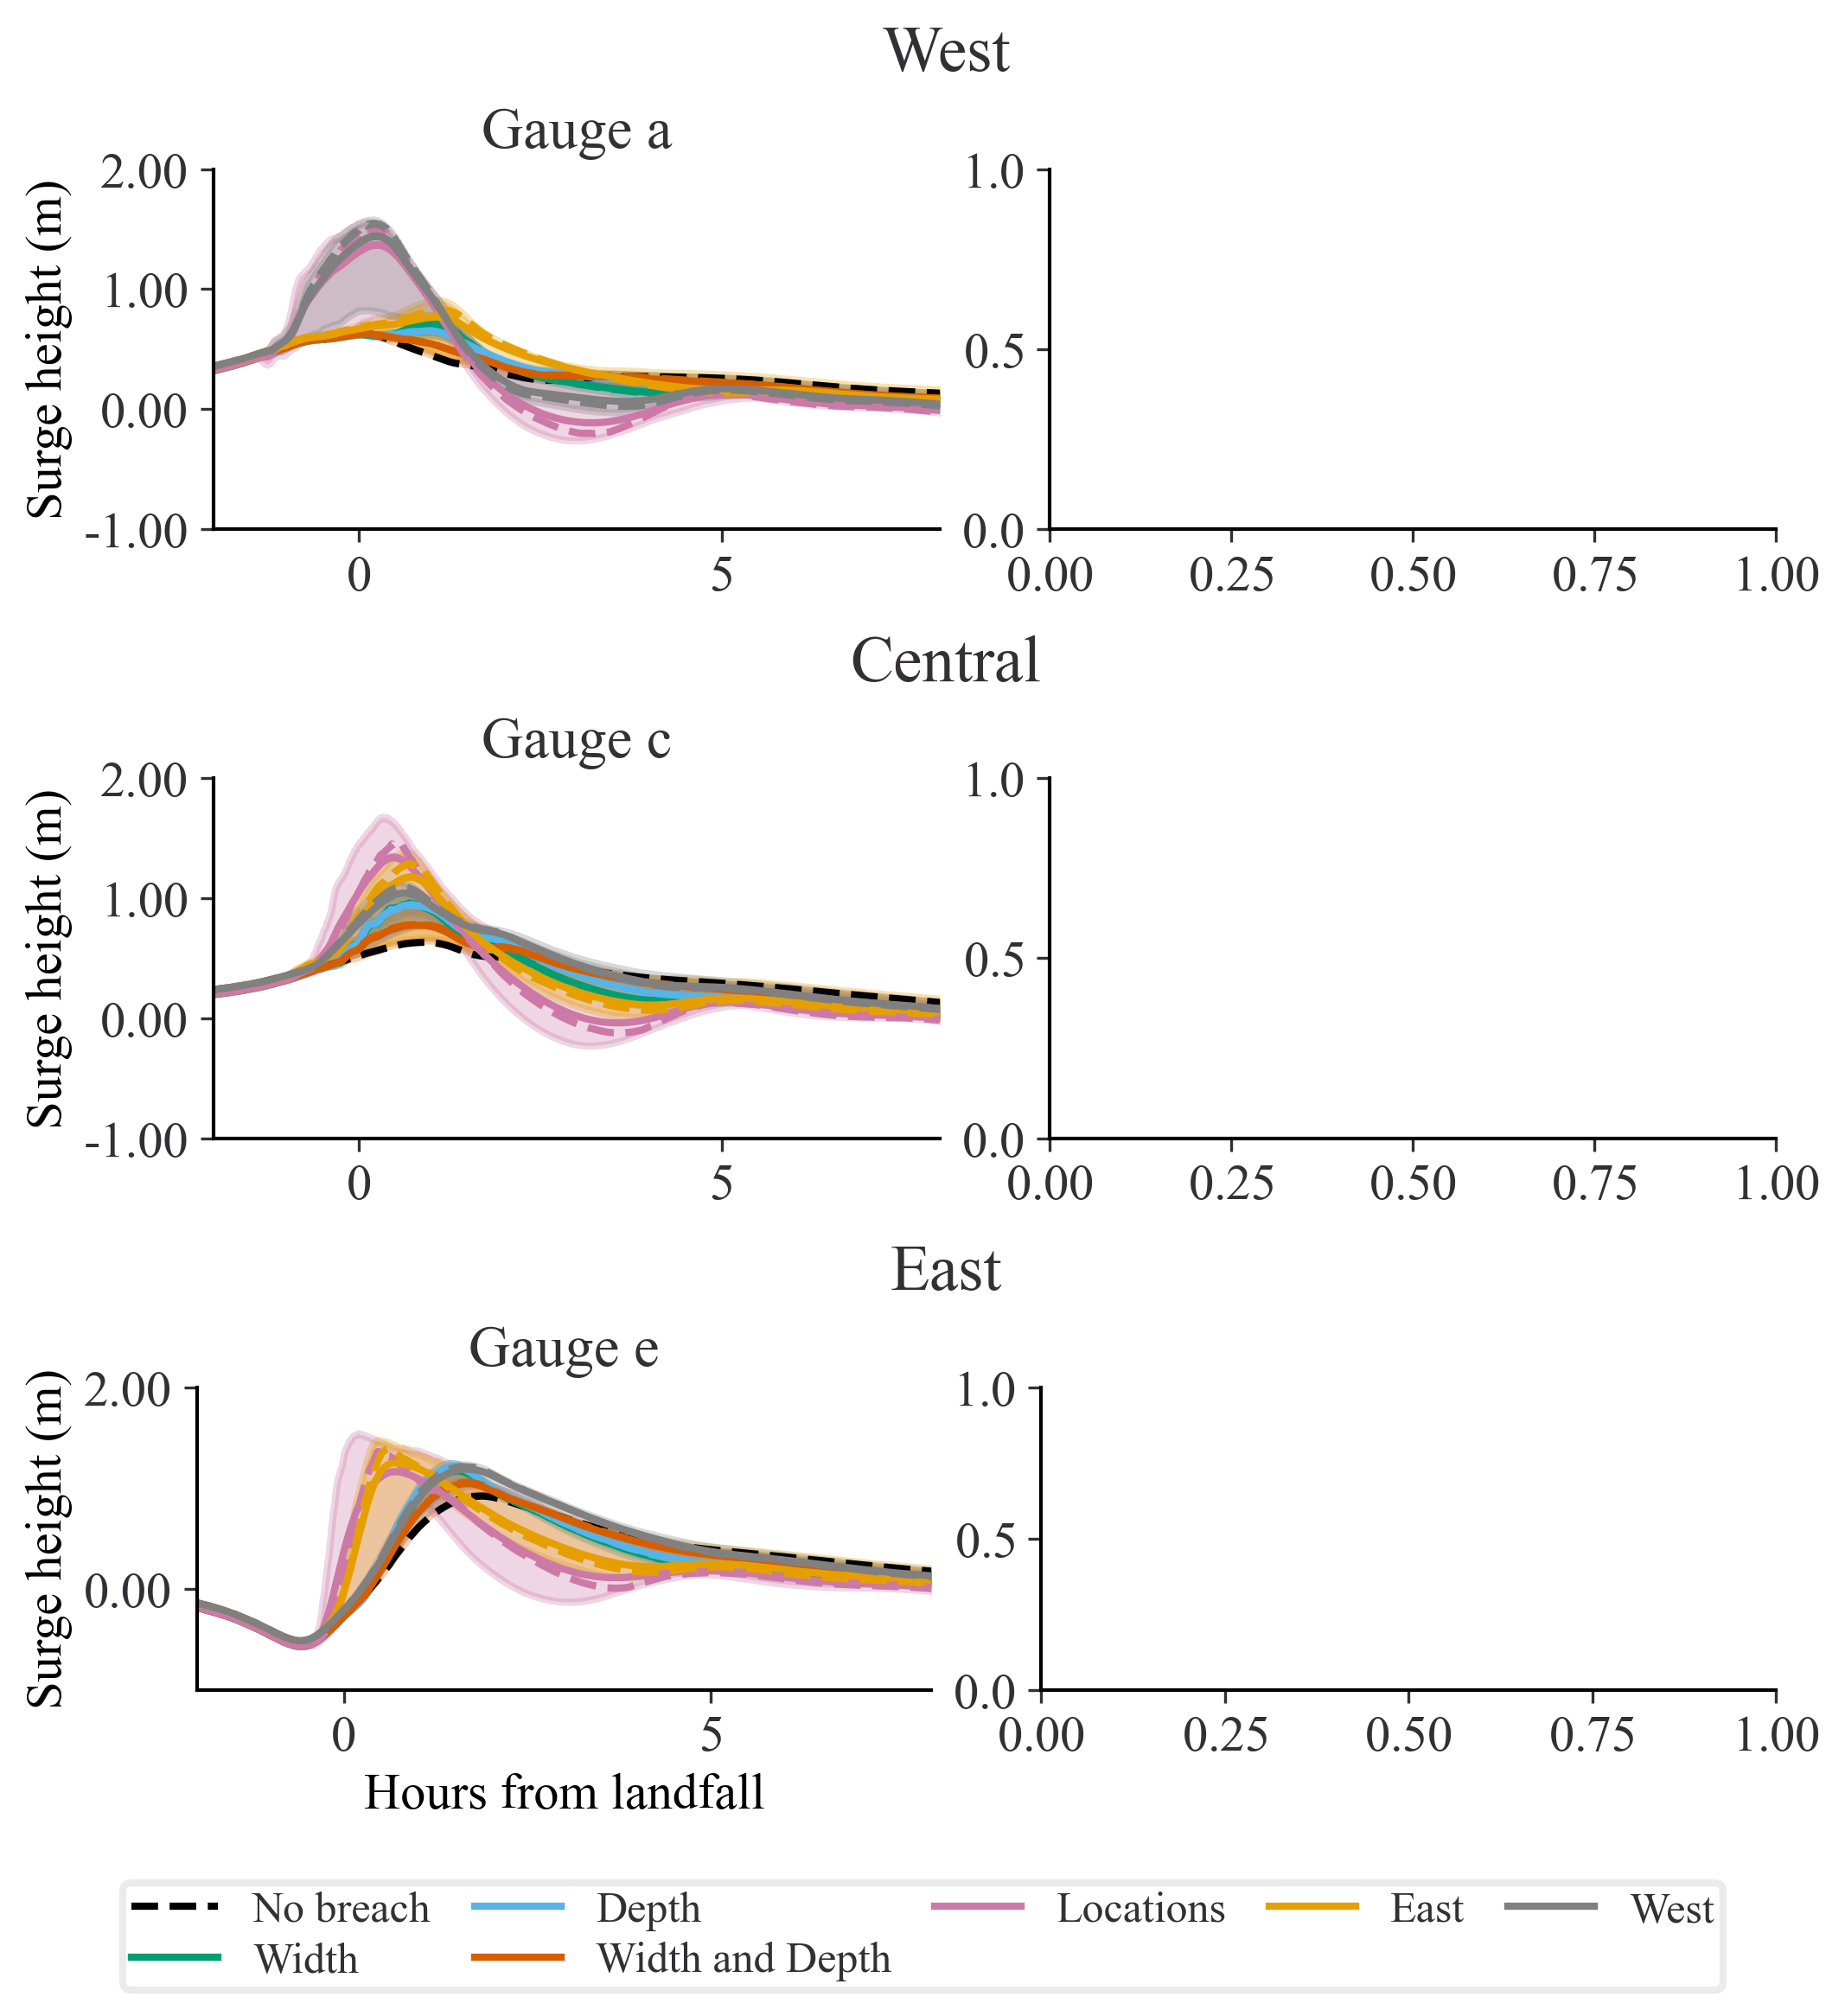

In [22]:
from matplotlib.ticker import FormatStrFormatter

# Define the grid size
num_rows = 3
num_cols = 2

# Create a figure and axes for the subplots
fig = plt.figure(constrained_layout=True, figsize=(7, 7))
subfigs = fig.subfigures(nrows=num_rows, ncols=1)
letters = ['a', 'b', 'c', 'd', 'e', 'f']
for i, (loc, loc_data) in enumerate(data.items()):
    axs = subfigs[i].subplots(nrows=1, ncols=2)
    mid = (fig.subplotpars.right + fig.subplotpars.left)/2
    subfigs[i].suptitle(f'{loc.capitalize()}', x=mid)
    
    # Iterate over the gauge numbers and plot each category's data
    for j, (n, gauge_data) in enumerate(loc_data.items()):
        ax = axs[j]
        for category, category_data in gauge_data['data'].items():
            if category_data['name'] not in ['east', 'west']:
                if category_data['name'] == 'No breach':
                    ax.plot(category_data['data'].index, category_data['data'], 
                            label=category_data['name'], color=category_data['color'], linestyle='--')
                else:
                    mean, medi,minp, maxp, mode = calc_perc(category_data['data'])
                    ax.plot(category_data['data'].index, mean, color=category_data['color'], label=category_data['name'])
                    ax.plot(category_data['data'].index, medi, color=category_data['color'], linestyle='--')
                    ax.fill_between(category_data['data'].index, minp, maxp, color=category_data['color'], alpha=0.3, rasterized=True)
        ax.set_title(f'Gauge {letters[i*2+j]}')
        ax.set_xlim(-2,8)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
        ax.xaxis.get_major_formatter()._usetex = False
        ax.yaxis.get_major_formatter()._usetex = False
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        # ax.tick_params(axis='both', which='major', labelsize=12, font='Times New Roman')


        if i == 2:
            ax.set_xlabel('Hours from landfall')
        if j == 0:
            ax.set_ylabel('Surge height (m)')
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center',
           bbox_to_anchor=(0,-0.1,1,0.25),  ncol=5, fontsize=12)
plt.savefig('/home/catherinej/BarrierIslandBreach/PaperFigures/fig5_v2.pdf', bbox_inches='tight', transparent=False)
plt.show()


In [226]:
import pandas as pd

# Assuming you have already loaded the data and defined the necessary functions (calc_perc, etc.)

# Initialize an empty DataFrame
result_df = pd.DataFrame()

# Iterate through data
for loc, loc_data in data.items():
    for n, gauge_data in loc_data.items():
        for category, category_data in gauge_data['data'].items():
            if category_data['name'] != 'No breach':
                # Calculate statistics (you've already done this)
                mean, median, fifth_perc, perc_95, mode = calc_perc(category_data['data'])
                
                # Append results to result_df
                result_df = result_df.append({'Category': category_key, 'Mean Max Time': mean.idxmax()*60, 'Mean Max Value': mean.max(), 
                     '5th Percentile Max Time': fifth_perc.idxmax()*60, '5th Percentile Max': fifth_perc.max(), 
                     '95th Percentile Max Time': perc_95.idxmax()*60, '95th Percentile Max': perc_95.idxmax()*60,
                     'Median Max Time': median.idxmax()*60, 'Median Max Value': median.max()}, 
                    ignore_index=True)

# Pivot the DataFrame to organize data by category and gauge number
# result_df_pivot = result_df.pivot(index='Category', columns='Gauge Number', values=['Statistic', 'Value', 'Time'])

# Display the resulting DataFrame
print(result_df_pivot)


/tmp/ipykernel_2422496/3352713461.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': category_key, 'Mean Max Time': mean.idxmax()*60, 'Mean Max Value': mean.max(),
/tmp/ipykernel_2422496/3352713461.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': category_key, 'Mean Max Time': mean.idxmax()*60, 'Mean Max Value': mean.max(),
/tmp/ipykernel_2422496/3352713461.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Category': category_key, 'Mean Max Time': mean.idxmax()*60, 'Mean Max Value': mean.max(),
/tmp/ipykernel_2422496/3352713461.py:17: FutureWarning: The frame.append method is deprecated and will be rem

NameError: name 'result_df_pivot' is not defined

In [225]:
result_df

,Category,Statistic,Value,Time,Mean Max Time,Mean Max Value,5th Percentile Max Time,5th Percentile Max,95th Percentile Max Time,Mean Min Time,Mean Min Value,5th Percentile Min Time,5th Percentile Min,95th Percentile Min Time
0,west,NaN,NaN,NaN,93.375000,0.437452,100.018333,0.400173,84.368333,599.995000,0.042376,599.995000,0.035491,599.995000
1,west,NaN,NaN,NaN,98.880000,0.417692,100.446667,0.403141,98.238333,599.995000,0.055655,599.995000,0.048037,599.995000
2,west,NaN,NaN,NaN,209.156667,0.383154,-7.583333,0.382924,98.743333,599.995000,0.077585,599.995000,0.055478,-576.575000
3,west,NaN,NaN,NaN,13.123333,1.263551,34.308333,0.569111,6.121667,599.995000,-0.171010,173.966667,-0.266448,599.995000
4,west,NaN,NaN,NaN,93.521667,0.517066,-3.361667,0.413027,85.925000,599.995000,0.084948,599.995000,0.076068,-409.246667
5,west,NaN,NaN,NaN,13.308333,1.352319,18.298333,0.634006,8.436667,599.995000,-0.071313,599.995000,-0.129073,599.995000
6,west,NaN,NaN,NaN,59.673333,0.710935,0.391667,0.619605,57.718333,599.995000,-0.062756,599.995000,-0.075915,599.995000
7,west,NaN,NaN,NaN,57.951667,0.653061,56.318333,0.623247,57.135000,599.995000,-0.037658,599.995000,-0.051691,599.995000
8,west,NaN,NaN,NaN,4.535000,0.624009,1.598333,0.621333,61.405000,599.995000,0.000405,599.995000,-0.038053,599.995000
9,west,NaN,NaN,NaN,15.136667,1.370487,17.413333,0.762435,8.018333,599.995000,-0.201952,178.800000,-0.261765,599.995000


In [213]:
df_table = pd.DataFrame() #lumns=['Gauge a', 'Gauge b', 'Gauge c', 'Gauge d', 'Gauge e', 'Gauge f'])

for i, (loc, loc_data) in enumerate(data.items()):
    for j, (n, gauge_data) in enumerate(loc_data.items()):
        for category, category_data in gauge_data['data'].items():
            if category_data['name'] != 'No breach':
                mean, _, _, maxp = calc_perc(category_data['data'])
                df_table.loc[ f'Gauge {letters[i*2+j]}', category] = mean.idxmax() * 60

print(df_table)

AttributeError: 'str' object has no attribute 'items'

In [131]:
latex_table = df_table.to_latex(index=False)

/tmp/ipykernel_2422496/2614299360.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_table.to_latex(index=False)


In [132]:
latex_table

'\\begin{tabular}{rrrrrr}\n\\toprule\n    width &     depth &         wd &       loc &      east &       west \\\\\n\\midrule\n93.375000 & 98.880000 & 209.156667 & 13.123333 & 93.521667 &  13.308333 \\\\\n59.673333 & 57.951667 &   4.535000 & 15.136667 & 64.108333 &  15.253333 \\\\\n41.826667 & 41.951667 &  49.061667 & 27.918333 & 42.136667 &  40.785000 \\\\\n40.980000 & 43.333333 &  48.293333 & 29.338333 & 43.576667 &  37.750000 \\\\\n84.933333 & 82.471667 &  97.080000 & 34.785000 & 39.463333 &  98.325000 \\\\\n92.576667 & 90.905000 & 100.358333 & 42.468333 & 42.263333 & 101.205000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [103]:
w.index[70630] #, 216]

86.9649999999999

In [135]:
categories['depth']['data']

,d_0093_6,d_0298_6,d_0106_6,d_0407_6,d_0237_6,d_0352_6,d_0272_6,d_0276_6,d_0144_6,d_0336_6,...,d_0277_6,d_0054_6,d_0189_6,d_0120_6,d_0426_6,d_0033_6,d_0063_6,d_0111_6,d_0259_6,d_0160_6
Time,,,,,,,,,,,,,,,,,,,,,
-9.999944,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,...,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476
-9.999778,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,...,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476
-9.999611,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,...,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476,0.072476
-9.999444,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,...,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475
-9.999278,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,...,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475,0.072475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.999278,-0.082712,-0.047222,-0.037815,-0.083222,-0.081228,-0.062246,-0.088043,-0.046141,-0.082789,-0.071747,...,-0.022270,-0.059977,-0.083073,-0.042202,-0.060787,-0.054418,-0.060078,-0.093378,-0.066800,-0.089998
9.999444,-0.082725,-0.047234,-0.037826,-0.083235,-0.081241,-0.062259,-0.088056,-0.046152,-0.082802,-0.071759,...,-0.022281,-0.059988,-0.083085,-0.042213,-0.060799,-0.054429,-0.060090,-0.093392,-0.066812,-0.090011
9.999611,-0.082738,-0.047245,-0.037838,-0.083248,-0.081254,-0.062271,-0.088069,-0.046164,-0.082815,-0.071771,...,-0.022292,-0.060000,-0.083098,-0.042224,-0.060811,-0.054440,-0.060102,-0.093405,-0.066824,-0.090024
